In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

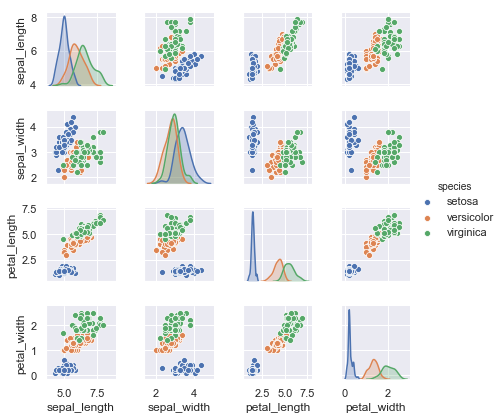

In [5]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [6]:
X_iris = iris.drop('species', axis=1) #извлекаем матрицу данных
X_iris.shape

(150, 4)

In [7]:
y_iris = iris['species'] #извлекаем целевой признак
y_iris.shape

(150L,)

In [9]:
iris.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

In [15]:
iris[iris['species']=='setosa'].describe()

sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

# Пример обучения с учителем: простая линейная регрессия

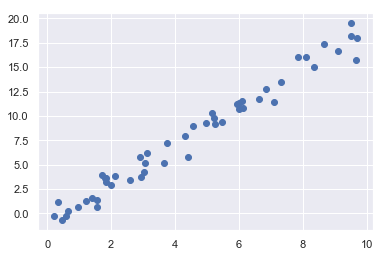

In [16]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(fit_intercept=True) #Создадим экземпляр класса LinearRegression и укажем 
                                             #с помощью гиперпараметра fit_intercept что нам бы хотелось
                                             #выполнить подбор точки пересечения с осью координат
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
X = x[:, np.newaxis] # для модели необходима двумерная матрица признаков размера [n_samples, n_features]
X.shape

(50L, 1L)

In [20]:
model.fit(X, y) #обучение модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print model.coef_  #угловой коэффициент
print model.intercept_ #свободный член

[1.9776566]
-0.9033107255311164


In [22]:
xfit = np.linspace(-1, 11) # новые данные
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit) #предсказания модели

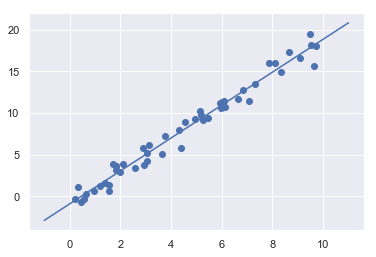

In [24]:
plt.scatter(x, y) #исходные данные
plt.plot(xfit, yfit) #предсказание модели

# Пример обучения с учителем: классификация набора данных Iris

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1) #делим данные на обучающую и тестовую выборки

In [27]:
from sklearn.naive_bayes import GaussianNB # 1. Выбираем класс модели
model = GaussianNB() # 2. Создаем экземпляр модели

In [28]:
model.fit(Xtrain, ytrain) # 3. Обучаем модель на данных
y_model = model.predict(Xtest) # 4. Предсказываем значения для новых данных

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Пример обучения без учителя: понижение размерности набора данных Iris

In [30]:
from sklearn.decomposition import PCA # 1. Выбираем класс модели
model = PCA(n_components=2) # 2. Создаем экземпляр модели с гиперпараметрами
model.fit(X_iris) # 3. Обучаем модель на данных. Обратите внимание, что y мы не указываем!
X_2D = model.transform(X_iris) # 4. Преобразуем данные в двумерные

In [34]:
X_2D.shape

(150L, 2L)

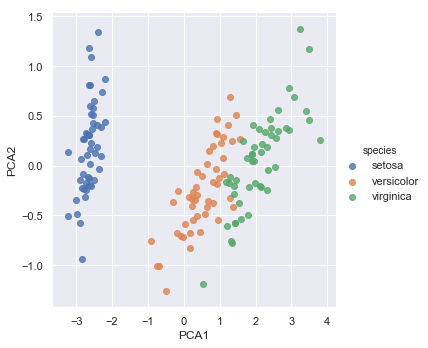

In [39]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

# Обучение без учителя: кластеризация набора данных Iris

In [42]:
from sklearn.mixture import GaussianMixture # 1. Выбираем класс модели
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Создаем экземпляр модели с гиперпараметрами
model.fit(X_iris) # 3. Обучаем модель на данных. Обратите внимание, что y мы не указываем!
y_gmm = model.predict(X_iris) # 4. Определяем метки кластеров

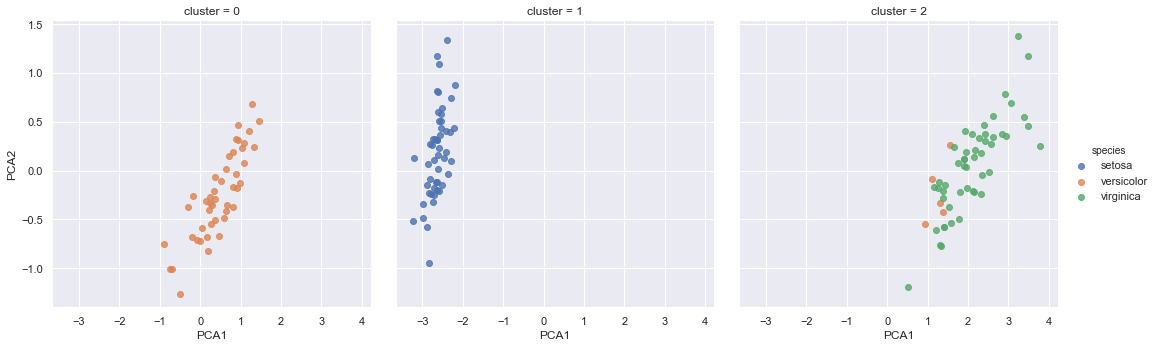

In [43]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

# Прикладная задача: анализ рукописных цифр

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797L, 8L, 8L)

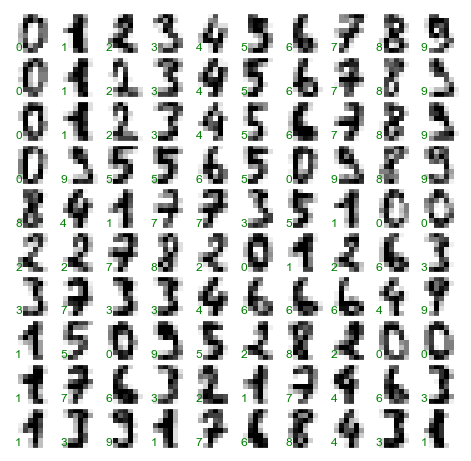

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [47]:
X = digits.data
X.shape

(1797L, 64L)

In [48]:
y = digits.target
y.shape

(1797L,)

## Обучение без учителя: понижение размерности

In [49]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797L, 2L)

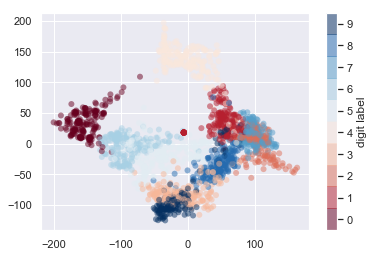

In [52]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('RdBu', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

## Классификация цифр

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [54]:
accuracy_score(ytest, y_model)

0.8333333333333334

Даже при такой исключительно простой модели мы получили более чем 80%-ную точность классификации цифр! Однако из одного числа сложно понять, где наша модель ошиблась. Для этой цели удобна так называемая матрица различий (confusion matrix), вычислить которую можно с помощью библиотеки Scikit-Learn, а нарисовать посредством Seaborn

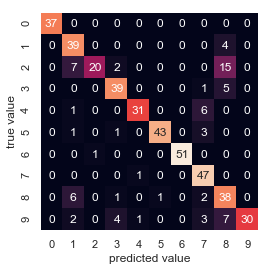

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') # Прогнозируемое значение
plt.ylabel('true value'); # Настоящее значение

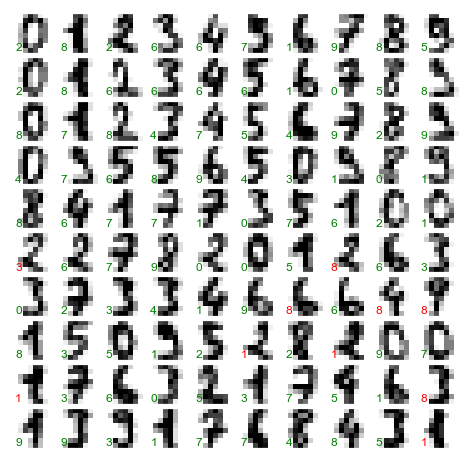

In [56]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')

# Отложенные данные для проверки модели

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [59]:
# Разделяем данные: по 50% в каждом из наборов
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# Обучаем модель на одном из наборов данных
model.fit(X1, y1)

# Оцениваем работу модели на другом наборе
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

# Перекрестная проверка модели (cross-validation)

In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv=5)
print score
print score.mean()

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


# Выбор оптимальной модели

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [69]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    # Создаем случайные выборки данных
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
        return X, y
X, y = make_data(40)

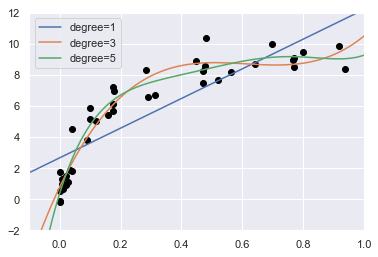

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

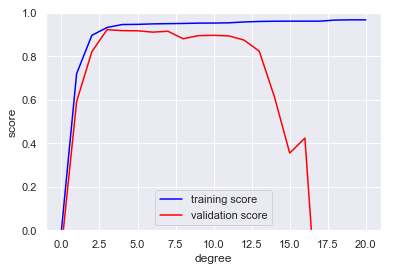

In [72]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') # Оценка обучения
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') # Оценка проверки
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree') # Степень
plt.ylabel('score'); # Оценка

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

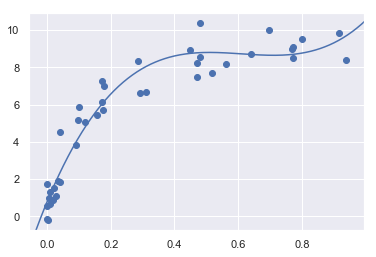

In [73]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test,);
plt.axis(lim)

# Кривые обучения в библиотеке Scikit-Learn (зависимость оценки от колличества данных)

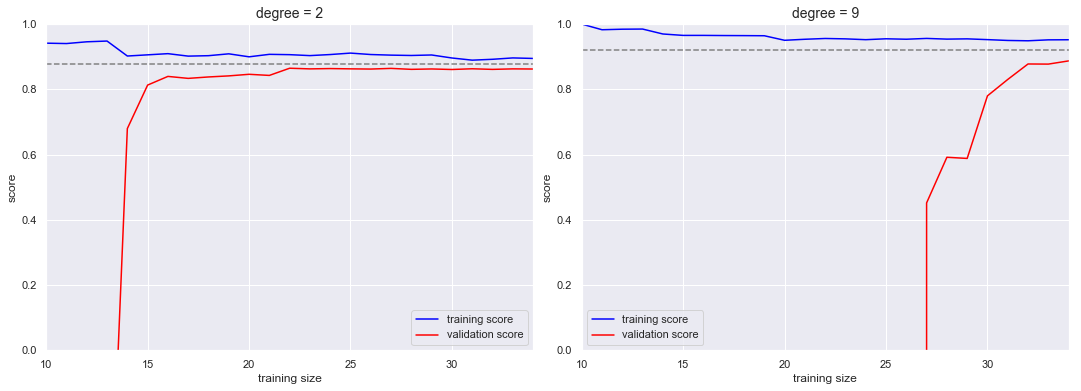

In [76]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size') # Размерность обучения
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# Проверка на практике: поиск по сетке

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [79]:
grid.fit(X, y)
grid.best_params_

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [80]:
model = grid.best_estimator_ #выбираем модель с лучшими гиперпараметрами

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

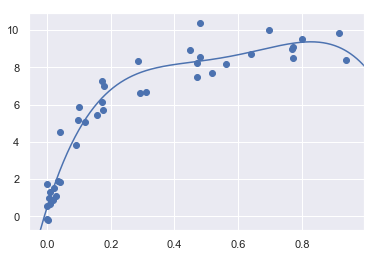

In [83]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim)

# Проектирование признаков

1) Категориальные данные (categorical data)

2) Признаки для представления текста и признаки для представления изображений. 

3) Производные признаки (derived features) для повышения сложности модели и заполнение отсутствующих данных.(векторизация)

# Категориальные признаки

In [1]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

## Прямое кодирование (one-hot encoding) 
- создание дополнительных столбцов-индикаторов наличия/отсутствия категории с помощью значений 1 или 0 соответственно

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [3]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [4]:
vec = DictVectorizer(sparse=True, dtype=int) #разреженный формат вывода данных (sparse)
vec.fit_transform(data)

<4x5 sparse matrix of type '<type 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

Для поддержки подобного кодирования библиотека Scikit-Learn включает две дополнительные утилиты: sklearn.preprocessing.OneHotEncoder и sklearn.feature_extraction.FeatureHasher.

# Текстовые признаки

Один из простейших методов кодирования данных — по количеству слов: для каждого фрагмента текста подсчитывается количество вхождений в него каждого из слов, после чего результаты помещаются в таблицу.

In [5]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<type 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [9]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

У этого подхода существуют проблемы: использование непосредственно количеств слов ведет к признакам, с которыми встречающимся очень часто словам придается слишком большое значение, а это в некоторых алгоритмах классификации может оказаться субоптимальным. Один из подходов к решению этой проблемы известен под названием «терма-обратная частотность документа» (term frequency-inverse document frequency) или TF-IDF. При нем слова получают вес с учетом частоты их появления во всех документах. Синтаксис вычисления этих признаков аналогичен предыдущему примеру:
# TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

# Признаки для изображений
(http://scikit-image.org/).

# Производные признаки

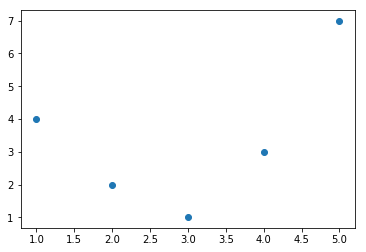

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

Очевидно, что следующие данные нельзя адекватно описать с помощью прямой линии. Очевидно, что для описания зависимости между x и y нам требуется использовать более сложную модель, чем линейная. Сделать это можно путем преобразования данных, добавив дополнительные столбцы признаков для увеличения гибкости модели.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X = x[:, np.newaxis]
X2 = poly.fit_transform(X)
print(X2) # В матрице производных признаков один столбец соответствует x, второй — x2, а третий — x3

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


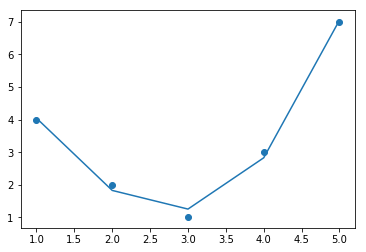

In [14]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

# Внесение отсутствующих данных

In [15]:
from numpy import nan
X = np.array([[ nan, 0, 3 ], [ 3, 7, 9 ], [ 3, 5, 2 ], [ 4, nan, 6 ], [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

In [19]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean') # заполнение пропущенных значений средним
X2 = imp.fit_transform(X)
X2

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

# Конвейеры признаков

In [20]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(
                      Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression()
                      )

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
model.fit(X, y) # Вышеприведенный массив X с пропущенными значениями
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


# Заглянем глубже: наивная байесовская классификация

Наивные байесовские модели — группа исключительно быстрых и простых алгоритмов классификации, зачастую подходящих для наборов данных очень высоких размерностей. В силу их быстроты и столь небольшого количества настраиваемых параметров они оказываются очень удобны в качестве грубого эталона для задач классификации.

# Байесовская классификация

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Гауссов наивный байесовский классификатор
В этом классификаторе допущение состоит в том, что данные всех категорий взяты из простого нормального распределения.

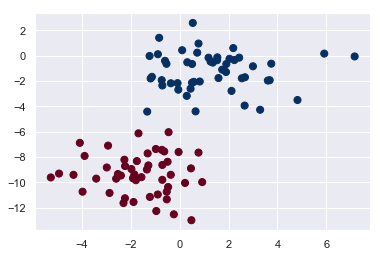

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Один из самых быстрых способов создания простой модели — допущение о том, что данные подчиняются нормальному распределению без ковариации между измерениями.

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2) #генерация новых данных
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

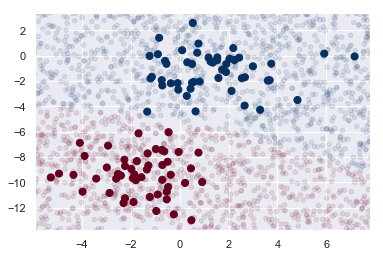

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu',
alpha=0.1)
plt.axis(lim)

In [30]:
yprob = model.predict_proba(Xnew) #вероятностная оценка принадлежности точки к классу
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Полиномиальный наивный байесовский классификатор

Допущением о том, что признаки сгенерированы на основе простого полиномиального распределения. Полиномиальное распределение описывает вероятность наблюдения количеств вхождений в несколько категорий, таким образом, полиномиальный наивный байесовский классификатор лучше всего подходит для признаков, отражающих количество или частоту вхождения.

Полиномиальный наивный байесовский классификатор нередко используется при классификации текста, где признаки соответствуют количеству слов или частотам их употребления в классифицируемых документах.

In [31]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [32]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [35]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.1331,0.5,'predicted label')

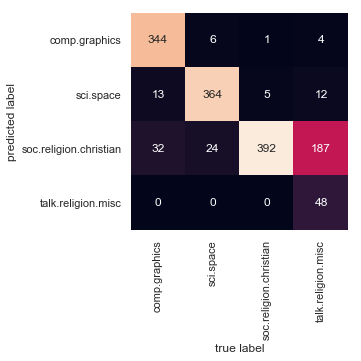

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [37]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [38]:
predict_category('sending a payload to the ISS')

'sci.space'

In [39]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [40]:
predict_category('determining the screen resolution')

'comp.graphics'

# Когда имеет смысл использовать наивный байесовский классификатор
1) они выполняют как обучение, так и предсказание исключительно быстро;

2) обеспечивают простое вероятностное предсказание;

3) их результаты часто очень легки для интерпретации;

4) у них очень мало (если вообще есть) настраиваемых параметров.

Эти достоинства означают, что наивный байесовский классификатор зачастую оказывается удачным кандидатом на роль первоначальной эталонной классификации. Если оказывается, что он демонстрирует удовлетворительные результаты, то поздравляем: вы нашли для своей задачи очень быстрый классификатор, возвращающий очень удобные для интерпретации результаты. Если же нет, то вы всегда можете начать пробовать более сложные модели, уже имея представление о том, насколько хорошо они должны работать.

Наивные байесовские классификаторы склонны демонстрировать особенно хорошие результаты в следующих случаях:

1) когда данные действительно соответствуют наивным допущениям (на практике бывает очень редко);

2) для очень хорошо разделяемых категорий, когда сложность модели не столь важна;

3) для данных с очень большим числом измерений, когда сложность модели не столь важна.

# Заглянем глубже: линейная регрессия

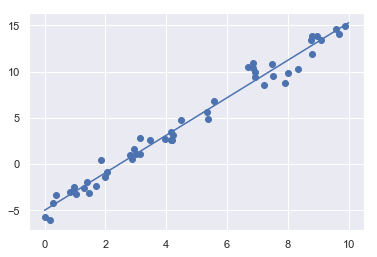

In [41]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [42]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

('Model slope: ', 2.0272088103606953)
('Model intercept:', -4.998577085553204)


## Полиномиальные базисные функции

In [43]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False) #преобразователь превратил наш одномерный массив в трехмерный путем возведения каждого из значений в степень
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

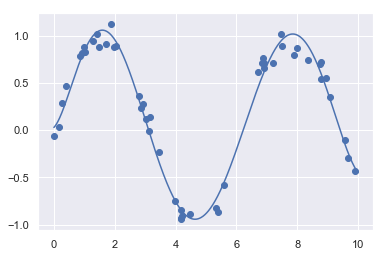

In [44]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

# Гауссовы базисные функции

(0, 10)

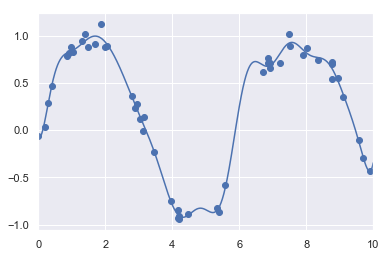

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin): #создание класса гауссовского преобразователя
    """Равномерно распределенные Гауссовы признаки
    для одномерных входных данных"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
        # Создаем N центров, распределенных по всему диапазону данных
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

# Регуляризация

(-1.5, 1.5)

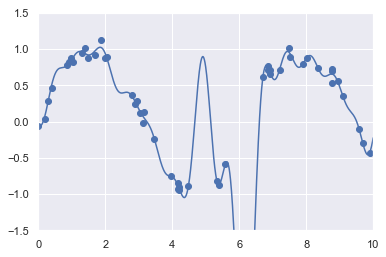

In [46]:
model = make_pipeline(GaussianFeatures(30), LinearRegression()) #делаем переобученную модель
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

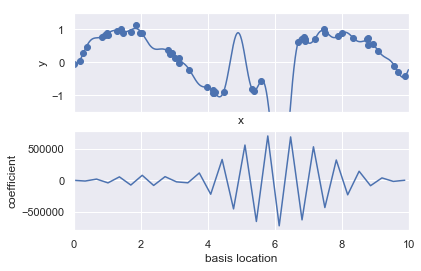

In [47]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',  ylabel='coefficient', xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

# Гребневая регрессия (L2-регуляризация)

Наложение штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели

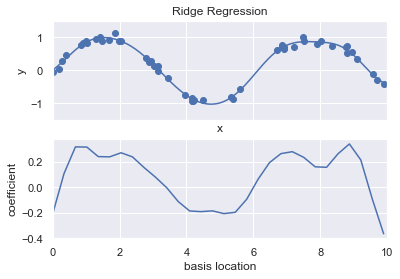

In [48]:
from sklearn.linear_model import Ridge #линейная модель с l2 регуляризацией
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression') # Гребневая регрессия

# Лассо-регуляризация (L1)
Штрафование на сумму абсолютных значений (L1-норма) коэффициентов регрессии

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


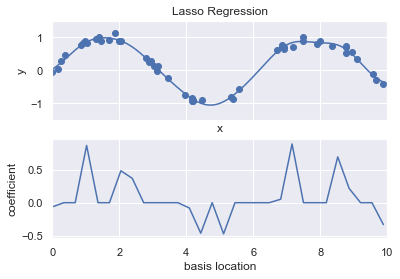

In [49]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression') # Лассо-регуляризация

При использовании штрафа лассо-регрессии большинство коэффициентов в точности равны нулю, а функциональное поведение моделируется небольшим подмножеством из имеющихся базисных функций

# Пример: предсказание велосипедного трафика

In [52]:
counts = pd.read_csv('FremontHourly.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('SeaTacWeather.csv', index_col='DATE', parse_dates=True)

In [54]:
counts.head()

Fremont Bridge NB  Fremont Bridge SB
Date                                                     
2012-10-02 00:00:00                0.0                0.0
2012-10-02 01:00:00                0.0                0.0
2012-10-02 02:00:00                0.0                0.0
2012-10-02 03:00:00                0.0                0.0
2012-10-02 04:00:00                0.0                0.0

In [56]:
weather.head()

STATION                                STATION_NAME  \
DATE                                                                        
2012-10-01  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-10-02  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-10-03  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-10-04  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-10-05  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   

            PRCP  SNWD  SNOW  TMAX  TMIN  AWND  WDF2  WDF5  ...  WT14  WT01  \
DATE                                                        ...               
2012-10-01     0     0     0   233    89    30    40    30  ... -9999 -9999   
2012-10-02     0     0     0   178   100    41    10    20  ... -9999 -9999   
2012-10-03     0     0     0   189    78    73    10    20  ... -9999 -9999   
2012-10-04     0     0     0   189    83    65    20    20  ... -9999 -9999   
2012-10-05     0     0     0   217    89    57   360   360  ... -9999 -9999   

            WT02  WT22  WT04  WT13  WT16  WT08  WT18  WT03  
DATE                                                        
2012-10-01 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  
2012-10-02 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  
2012-10-03 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  
2012-10-04 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  
2012-10-05 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  

[5 rows x 22 columns]

In [57]:
daily = counts.resample('d', how='sum')
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # удаляем остальные столбцы

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [58]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2015')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

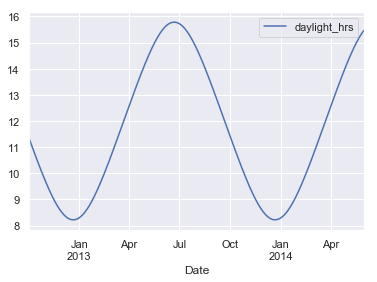

In [69]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Рассчитываем длительность светового дня для заданной даты"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()

In [70]:
# Температуры указаны в десятых долях градуса Цельсия; преобразуем в градусы
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# Осадки указаны в десятых долях миллиметра; преобразуем в дюймы
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [71]:
daily['annual'] = (daily.index - daily.index[0]).days / 365. #счетчик, который будет увеличиваться, начиная с первого дня, и отмерять количество прошедших лет.

In [72]:
daily.head()

Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                           
2012-10-02  1938.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0     11.335681   
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-02   0.0     13.90        1  0.000000  
2012-10-03   0.0     13.35        1  0.002740  
2012-10-04   0.0     13.60        1  0.005479  
2012-10-05   0.0     15.30        1  0.008219  
2012-10-06   0.0     15.85        1  0.010959

In [73]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total'] # Всего
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

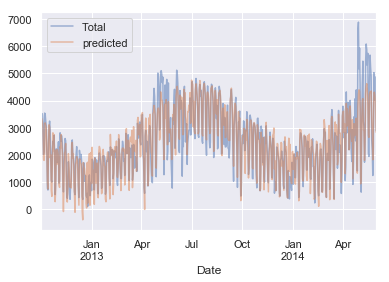

In [74]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [75]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              265.779104
Tue              306.551668
Wed              359.247220
Thu              199.486334
Fri              -93.133822
Sat            -1276.752727
Sun            -1308.178141
holiday        -1190.062935
daylight_hrs     137.183312
PRCP            -662.551672
dry day          558.729470
Temp (C)          64.596364
annual           210.767214
dtype: float64

In [76]:
#вычислить погрешности можно путем бутстрэппинга
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [77]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            266.0  128.0
Tue            307.0  128.0
Wed            359.0  124.0
Thu            199.0  127.0
Fri            -93.0  115.0
Sat          -1277.0  128.0
Sun          -1308.0  129.0
holiday      -1190.0  196.0
daylight_hrs   137.0   14.0
PRCP          -663.0   70.0
dry day        559.0   44.0
Temp (C)        65.0    5.0
annual         211.0   47.0


# Метод опорных векторов (support vector machines, SVMs)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

Мы рассмотрим разделяющую классификацию (discriminative classification) - найдем прямую или кривую (в двумерном пространстве) или многообразие (в многомерном пространстве), отделяющее классы друг от друга. 
## Метод опорных векторов: максимизирует отступ между классами

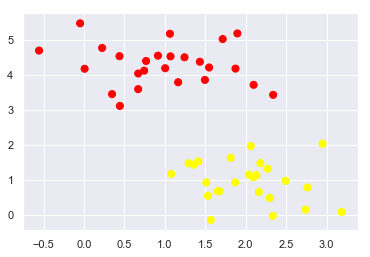

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [3]:
from sklearn.svm import SVC # "Классификатор на основе метода опорных векторов"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Строим график решающей функции для двумерной SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Создаем координатную сетку для оценки модели
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # Рисуем границы принятия решений и отступы
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Рисуем опорные векторы
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=2, facecolors='green');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

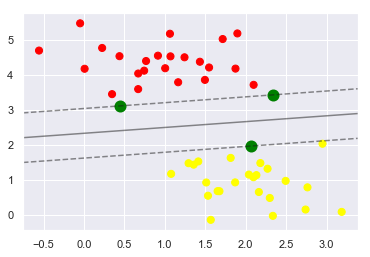

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=True)

In [20]:
model.support_vectors_ #координаты опорных векторов, зеленые точки на графике

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# SVM-ядро

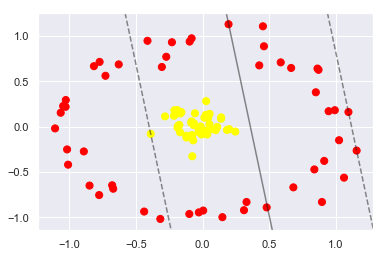

In [23]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1) #данные не разделимы линейным методом
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

Спроецируем эти данные в пространство более высокой размерности, поэтому линейного разделителя будет достаточно. Например, одна из подходящих простых проекций — вычисление радиальной базисной функции, центрированной по середине совокупности данных

In [32]:
r = np.exp(-(X ** 2).sum(axis=1))

In [33]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

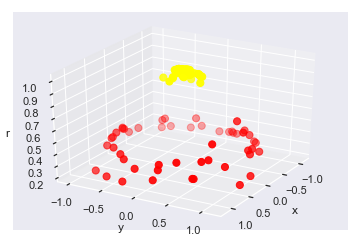

In [35]:
plot_3D(elev=30, azim=30, X=X, y=y)

Как видим, при наличии третьего измерения данные можно элементарно разделить линейно путем проведения разделяющей плоскости на высоте, скажем, r = 0,7. Нам пришлось тщательно выбрать и внимательно настроить нашу проекцию: если бы мы не центрировали радиальную базисную функцию должным образом, то не получили бы столь «чистых», разделяемых линейно результатов. 

Необходимость подобного выбора — задача, требующая решения: хотелось бы каким-то образом автоматически находить оптимальные базисные функции.

Одна из применяемых с этой целью стратегий состоит в вычислении базисных функций, центрированных по каждой из точек набора данных, с тем чтобы далее алгоритм SVM проанализировал полученные результаты. Эта разновидность преобразования базисных функций, известная под названием преобразования ядра (kernel transformation), основана на отношении подобия (или ядре) между каждой парой точек.


In [36]:
clf = SVC(kernel='rbf', C=1E6) # заменить линейное ядро на ядро RBF (radial basis function — «радиальная базисная функция»)
clf.fit(X, y)

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

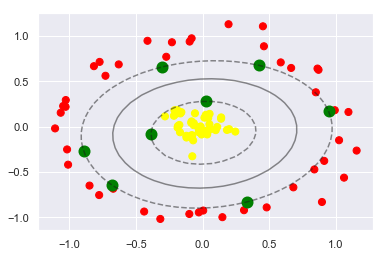

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

# Настройка SVM: размытие отступов

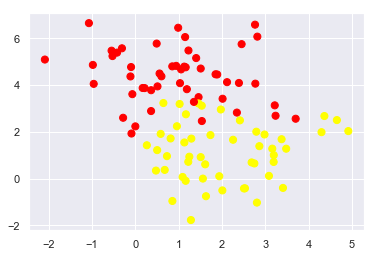

In [38]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) #кластеры перекрываются
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

На этот случай в реализации метода SVM есть небольшой поправочный параметр для «размытия» отступа. Данный параметр разрешает некоторым точкам «заходить» на отступ в тех случаях, когда это приводит к лучшей аппроксимации. Степень размытости отступа управляется настроечным параметром, известным под названием C. При очень большом значении параметра C отступ является «жестким» и точки не могут находиться на нем. При меньшем значении параметра C отступ становится более размытым и может включать в себя некоторые точки. 
Оптимальное значение параметра C зависит от конкретного набора данных. Его следует настраивать с помощью кросс валидации или какой-либо аналогичной процедуры

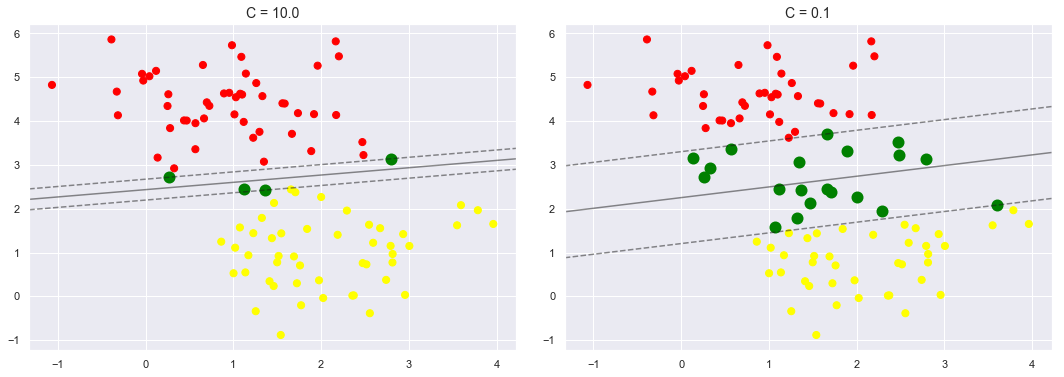

In [42]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Пример: распознавание лиц

In [43]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348L, 62L, 47L)


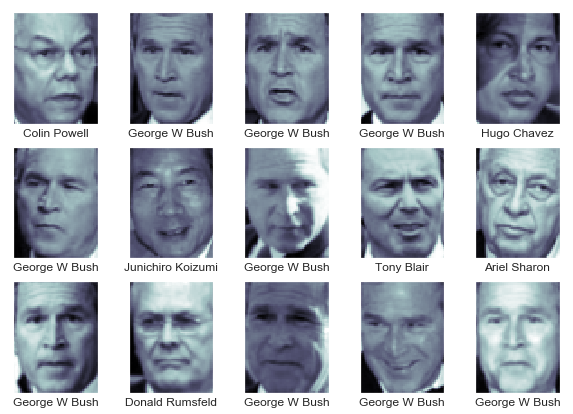

In [47]:
fig, ax = plt.subplots(3, 5, figsize=(10, 7))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [49]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [51]:
# разбиваем данные на обучение и тест
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [55]:
# настраиваем параметры путем поиска по сетке
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=5)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 1min 2s
{'svc__gamma': 0.001, 'svc__C': 5}


In [56]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5,0.98,'Predicted Names; Incorrect Labels in Red')

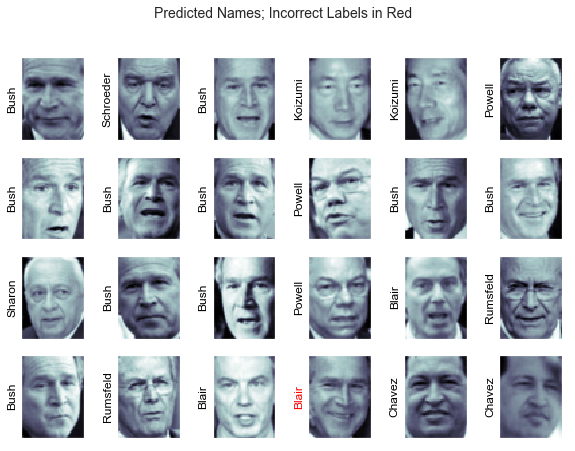

In [58]:
fig, ax = plt.subplots(4, 6, figsize=(10,7))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.76      0.84      0.80        31
    George W Bush       0.97      0.81      0.88       126
Gerhard Schroeder       0.69      0.87      0.77        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.89      0.98      0.93        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.82      0.87      0.83       337
     weighted avg       0.87      0.85      0.86       337



Text(89.18,0.5,'predicted label')

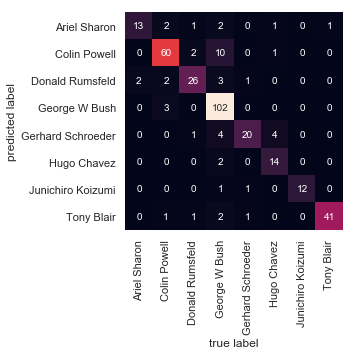

In [60]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Резюме по методу опорных векторов

В этом разделе мы привели краткое и понятное введение в основы методов опорных векторов. Эти методы являются мощными методами классификации по ряду причин.

1) Зависимость их от относительно небольшого количества опорных векторов означает компактность модели и небольшое количество используемой оперативной памяти.

2) Фаза предсказания после обучения модели занимает очень мало времени.

3)Поскольку на работу этих методов влияют только точки, находящиеся возле отступа, они хорошо подходят для многомерных данных — даже данных с количеством измерений большим, чем количество выборок, — непростые условия работы для других алгоритмов.

4)Интеграция с ядерными методами делает их универсальными, обеспечивает приспособляемость к множеству типов данных.
Однако у методов опорных векторов есть и несколько недостатков.

5)Они масштабируются при количестве выборок N в наихудшем случае как O[N3] (O[N2] для более эффективных реализаций). При значительном количестве обучающих выборок вычислительные затраты могут оказаться непомерно высокими.

6) Результаты зависят от удачности выбора параметра размытия C. Его необходимо тщательно выбирать с помощью перекрестной проверки, которая тоже может потребовать значительных вычислительных затрат при росте размеров наборов данных.

7) У результатов отсутствует непосредственная вероятностная интерпретация. Ее можно получить путем внутренней перекрестной проверки (см. параметр probability оценивателя SVC), но эта дополнительная оценка обходится недешево в смысле вычислительных затрат.

# Деревья решений и случайные леса

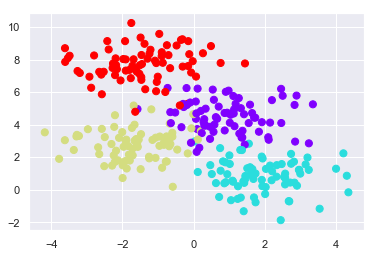

In [61]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [62]:
from sklearn.tree import DecisionTreeClassifier #ПРОСТОЕ ДЕРЕВО
tree = DecisionTreeClassifier().fit(X, y)

In [63]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Обучаем оцениватель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, 
                           cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

C:\Users\Vladuk\Anaconda2\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


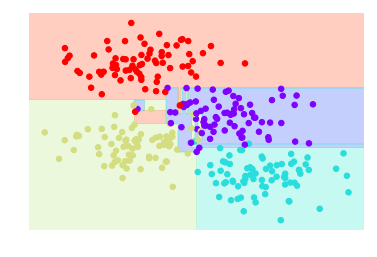

In [64]:
visualize_classifier(DecisionTreeClassifier(), X, y)

# Ансамбли оценивателей: случайные леса

Баггинг использует ансамбль (например, своеобразную «шляпу фокусника») параллельно работающих переобучаемых оценивателей и усредняет результаты для получения оптимальной классификации. Ансамбль случайных деревьев принятия решений называется случайным лесом (random forest)

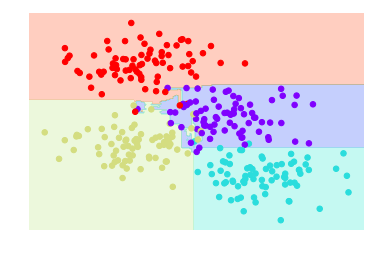

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

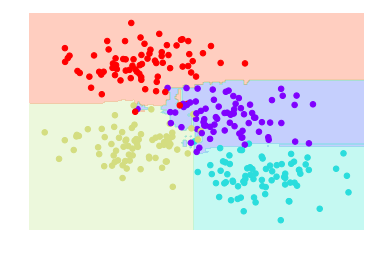

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0) #усредняем 100 моделей
visualize_classifier(model, X, y)

# Регрессия с помощью случайных лесов

<ErrorbarContainer object of 3 artists>

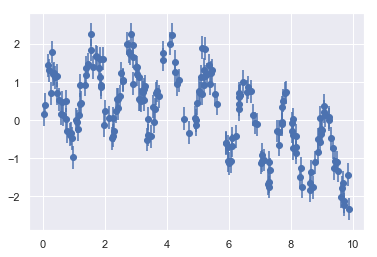

In [75]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

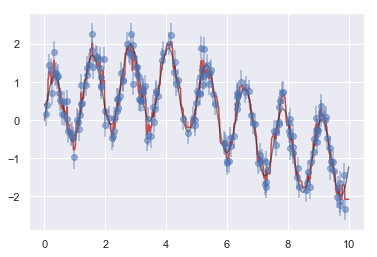

In [76]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y) # оптимальную аппроксимирующую кривую с помощью регрессии на основе случайного леса
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)

# Пример: использование случайного леса для классификации цифр

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

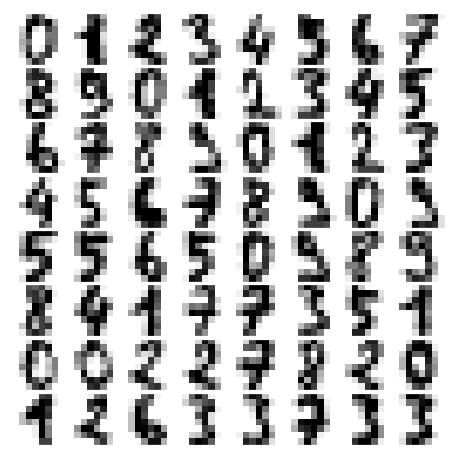

In [78]:
# Настройки рисунка
fig = plt.figure(figsize=(6, 6)) # размер рисунка в дюймах
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# Рисуем цифры: размер каждого изображения 8 x 8 пикселов
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [80]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [81]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18,0.5,'predicted label')

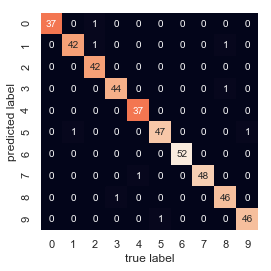

In [82]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Вывод: 
Случайные леса — мощный метод, обладающий несколькими достоинствами.

1)Как обучение, так и предсказание выполняются очень быстро в силу простоты лежащих в основе модели деревьев принятия решений. Кроме того, обе задачи допускают эффективную параллелизацию, так как отдельные деревья представляют собой совершенно независимые сущности.

2)Вариант с несколькими деревьями дает возможность использования вероятностной классификации: решение путем «голосования» оценивателей дает оценку вероятности (в библиотеке Scikit-Learn ее можно получить с помощью метода predict_proba()).

3)Непараметрическая модель исключительно гибка и может эффективно работать с задачами, на которых другие оцениватели оказываются недообученными.

Основной недостаток случайных лесов состоит в том, что результаты сложно интерпретировать.Чтобы сделать какие-либо выводы относительно смысла модели классификации, случайные леса — не лучший вариант.

# Метод главных компонент (PCA - principal component analysis)
Метод главных компонент — быстрый и гибкий метод машинного обучения без учителя.
PCA представляет собой алгоритм понижения размерности, но он может быть также удобен в качестве инструмента визуализации, фильтрации шума, выделения и проектирования признаков

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.0195904306706842)

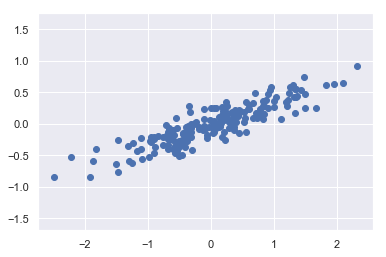

In [83]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [95]:
print(pca.components_) #направление главных векторов (1столбец - x координата, 2 столбец - y координата)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [96]:
print(pca.explained_variance_) #дисперсия вдоль первого и второго векторов

[0.7625315 0.0184779]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.0195904306706842)

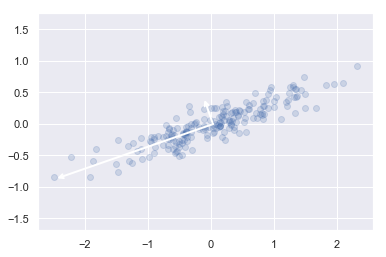

In [97]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', facecolor = 'black', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# Рисуем данные
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

# PCA как метод понижения размерности
Использование метода PCA для понижения размерности включает обнуление одной или нескольких из наименьших главных компонент, в результате чего данные проецируются на пространство меньшей размерности с сохранением максимальной дисперсии данных.

In [100]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) #проекцирование данных на главные компоненты 
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

('original shape: ', (200L, 2L))
('transformed shape:', (200L, 1L))


(-2.771528780690219,
 2.661757596590678,
 -0.9964674432667128,
 1.0219081775900811)

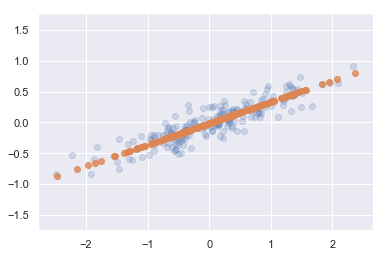

In [101]:
X_new = pca.inverse_transform(X_pca) #обратное преобразование данных в старую систему координат
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

# Использование метода PCA для визуализации: рукописные цифры

In [102]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797L, 64L)

In [103]:
pca = PCA(2) # Проекция из 64-мерного в двумерное пространство
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797L, 64L)
(1797L, 2L)


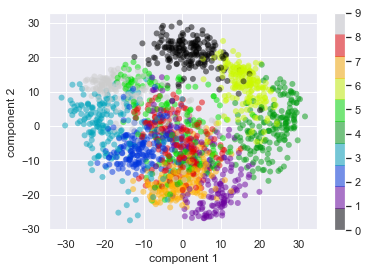

In [105]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1') # Компонента 1
plt.ylabel('component 2') # Компонента 2
plt.colorbar()

# Выбор количества компонент

Важнейшая составная часть использования метода PCA на практике — оценка количества компонент, необходимого для описания данных. Определить это количество можно с помощью представления интегральной доли объяснимой дисперсии (explained variance ratio) в виде функции от количества компонент

Text(0,0.5,'cumulative explained variance')

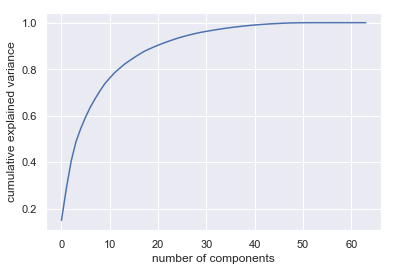

In [106]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #колличество учтеной дисперсии от числа компонент
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Использование метода PCA для фильтрации шума

Метод PCA можно применять для фильтрации зашумленных данных. Основная идея состоит в следующем: шум должен довольно мало влиять на компоненты с дисперсией, значительно превышающей его уровень. Восстановление данных с помощью лишь самого крупного подмножества главных компонент должно приводить к относительному сохранению сигнала и отбрасыванию шума.

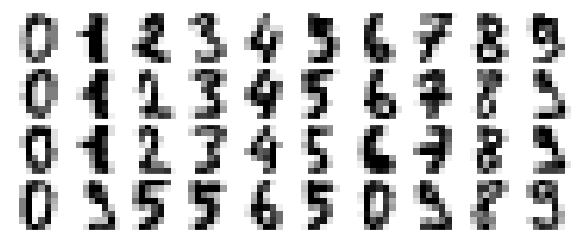

In [109]:
def plot_digits(data): #строим чистые данные
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

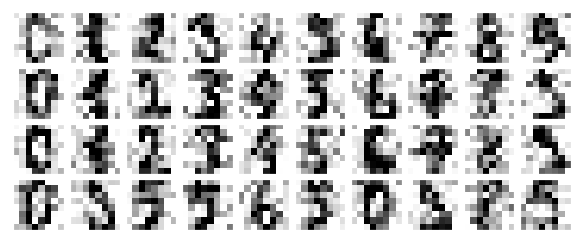

In [112]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4) #создадим шум на данных
plot_digits(noisy)

In [113]:
pca = PCA(0.50).fit(noisy) #применяем pca сохранив 50% дисперсии
pca.n_components_

12

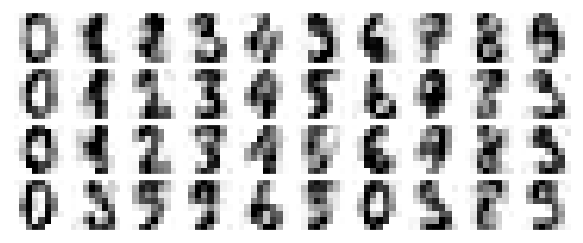

In [114]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components) #отфильтрованные данные
plot_digits(filtered)

# Пример: метод Eigenfaces

In [115]:
#from sklearn.datasets import fetch_lfw_people
#faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348L, 62L, 47L)


In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 150, svd_solver='randomized') # cохраняем 150 компонент из 3000
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

Визуализируем первые 150 компонент (собственные лица)

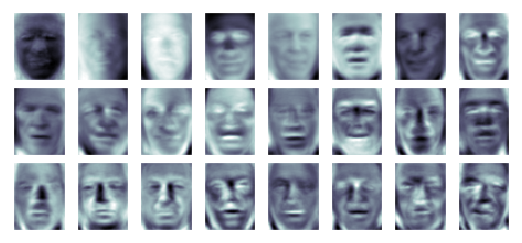

In [117]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0,0.5,'cumulative explained variance')

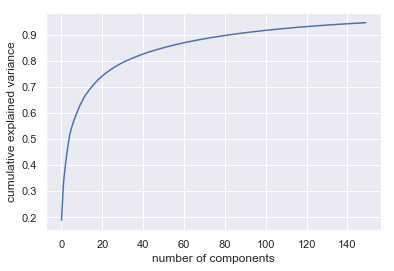

In [118]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [119]:
# Вычисляем компоненты и проекции лиц
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data) #проектируем данные на главные компоненты
projected = pca.inverse_transform(components) #переходим обратно в исходную систему координат

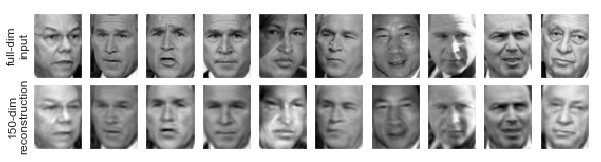

In [120]:
# Рисуем результаты
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput') # Полноразмерные входные данные
ax[1, 0].set_ylabel('150-dim\nreconstruction'); # 150-мерная реконструкция

# Резюме метода главных компонент

В этом разделе мы обсудили использование метода главных компонент для понижения размерности, визуализации многомерных данных, фильтрации шума и выбора признаков в многомерных данных. 

Метод PCA благодаря своей универсальности и легкой интерпретируемости результатов оказался эффективным в множестве контекстов и дисциплин. Я стараюсь при работе с любым многомерным набором данных начинать с использования метода PCA для визуализации зависимостей между точками (аналогично тому, как мы сделали с рукописными цифрами), выяснения дисперсии данных (аналогично тому, как мы поступили с собственными лицами) и выяснения внутренней размерности данных (путем построения графика доли объяснимой дисперсии). PCA не подходит для всех многомерных наборов данных, но с его помощью можно просто и эффективно почерпнуть о наборе многомерных данных полезную информацию.

Основной недостаток метода PCA состоит в том, что на него оказывают сильное влияние аномальные значения в данных. Поэтому было разработано немало ошибкоустойчивых вариантов PCA, многие из них стремятся итеративно отбрасывать те точки данных, которые описываются исходными компонентами недостаточно хорошо. 

Библиотека Scikit-Learn содержит несколько интересных вариантов метода PCA, включая классы RandomizedPCA и SparsePCA, находящиеся в модуле sklearn.decomposition. RandomizedPCA, который мы уже встречали ранее, использует недетерминированный метод для быстрой аппроксимации нескольких первых из главных компонент данных с очень высокой размерностью, а SparsePCA вводит понятие регуляризации (см. раздел «Заглянем глубже: линейная регрессия» данной главы), служащее для обеспечения разреженности компонент.

# Обучение на базе многообразий (manifold learning)

Методы понижения размерности для ниленейных моделей

1)Многомерное масштабирование (multidimensional scaling, MDS)

2)Локально линейное вложение (locally linear embedding, LLE)

3)Изометрическое отображение (isometric mapping, Isomap)

In [122]:
def make_hello(N=1000, rseed=42): # Создаем рисунок с текстом "HELLO"; сохраняем его в формате PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Открываем этот PNG-файл и берем из него случайные точки
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(-0.11881377209280353,
 4.140158966213945,
 0.0295819771725373,
 1.0142039520339077)

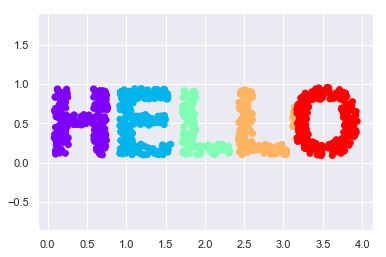

In [123]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

# Многомерное масштабирование (MDS)

(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

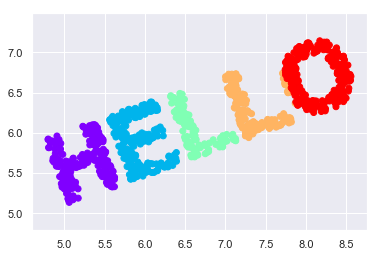

In [124]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

Значения x и y не обязательно важны для внутренних зависимостей данных. Существенно в таком случае расстояние между каждой из точек и всеми остальными точками набора данных.

Для представления его часто используют так называемую матрицу расстояний: при N точках создается такой массив размера N × N, что его элемент (i, j) содержит расстояние между точками i и j. Воспользуемся эффективной функцией pairwise_distances из библиотеки Scikit-Learn, чтобы выполнить этот расчет для наших исходных данных:

In [125]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000L, 1000L)

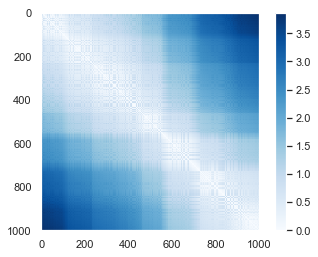

In [126]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest') #Визуализация матрицы расстояний между точками
plt.colorbar()

In [127]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) #сравнение матрицы расстояний между точками для исходных данных и повернутых

True

## !Алгоритм многомерного масштабирования: по заданной матрице расстояний между точками он восстанавливает D-мерное координатное представление данных

(-1.039006410772756, 1.037713398996314, -2.064666005451131, 2.1354582444849135)

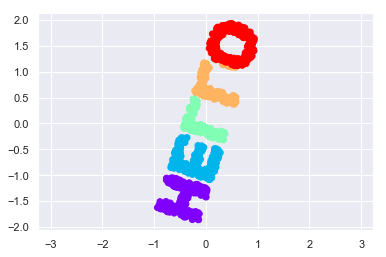

In [128]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) # dissimilarity='precomputed' - ПОКАЗЫВАЕТ, ЧТО В МОДЕЛЬ ПЕРЕДАЕТСЯ МАТРИЦА РАССТОЯНИЙ
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

# MDS как обучение на базе многообразий

Полезность этого метода становится еще очевиднее, если учесть, что матрицы расстояний можно вычислить для данных любой размерности. Так, например, вместо вращения данных в двумерном пространстве можно спроецировать их в трехмерное пространство с помощью следующей функции (по существу, это трехмерное обобщение матрицы вращения, с которой мы имели дело ранее)

In [129]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X3 = random_projection(X, 3)
X3.shape

(1000L, 3L)

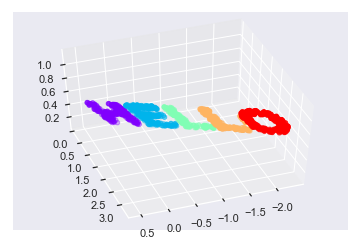

In [130]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

(-1.0390064107727583,
 1.0377133989963168,
 -2.06466600545113,
 2.1354582444849144)

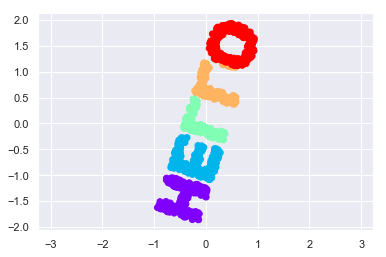

In [131]:
model = MDS(n_components=2, random_state=1) #Восстановление двумерной картинки
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

# Нелинейные вложения: там, где MDS не работает

До сих пор мы говорили о линейных вложениях, состоящих из вращений, сдвигов и масштабирований данных в пространствах более высокой размерности. Однако в случае нелинейного вложения, то есть при выходе за пределы этого простого набора операций, метод MDS терпит неудачу. Рассмотрим следующее вложение, при котором входные данные деформируются в форму трехмерной буквы S:

In [132]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)

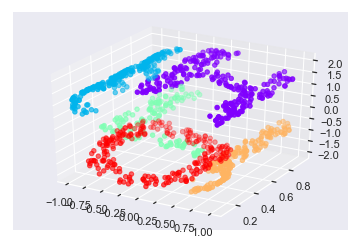

In [133]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

Базовые зависимости между точками данных сохранены, но на этот раз данные были преобразованы нелинейным образом: они были свернуты в форму буквы S.
Если попытаться использовать для этих данных простой алгоритм MDS, он не сумеет «развернуть» это нелинейное вложение и мы потеряем из виду существенные зависимости во вложенном многообразии

(-1.390455632355433,
 1.2493637628504974,
 -2.3855494181659074,
 2.189985912355557)

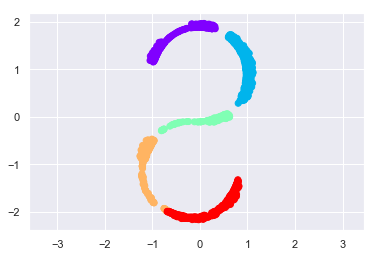

In [134]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

# Нелинейные многообразия: локально линейное вложение (LLE)

В отличии от MDS, вместо сохранения всех расстояний сохраняются только расстояния между соседними точками

(0.15, -0.15)

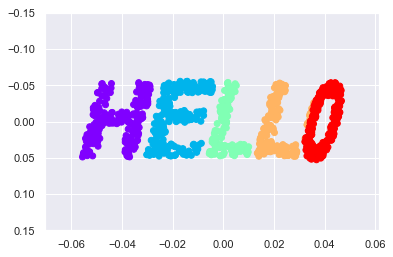

In [135]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

# Некоторые соображения относительно методов обучения на базе многообразий

Хотя это и была захватывающая история, на практике методы обучения на базе многообразий оказываются настолько привередливыми, что они редко используются для чего-то большего, чем простая качественная визуализация многомерных данных.

Вот несколько конкретных вопросов, в которых обучение на базе многообразий выглядит плохо по сравнению с методом PCA.

1) При обучении на базе многообразий не существует удачного фреймворка для обработки отсутствующих данных. В отличие от него в методе PCA существуют простые итеративные подходы для работы с отсутствующими данными.

2) При обучении на базе многообразий наличие шума в данных может «закоротить» многообразие и коренным образом изменить вложение. В отличие от него метод PCA естественным образом отделяет шум от наиболее важных компонент.

3) Результат вложения многообразия обычно сильно зависит от количества выбранных соседей, и не существует надежного, формулируемого количественно способа выбора оптимального числа соседей. В отличие от него метод PCA не требует подобного выбора.

4) При обучении на базе многообразий непросто определить оптимальное число измерений на выходе алгоритма. В отличие от него метод PCA позволяет определить выходную размерность, основываясь на объяснимой дисперсии.

5) При обучении на базе многообразий смысл вложенных измерений не всегда понятен. В методе PCA смысл главных компонент совершенно ясен.

6) При обучении на базе многообразий вычислительная сложность методов составляет O[N2] или даже O[N3]. Некоторые рандомизированные варианты метода PCA работают гораздо быстрее (однако в пакете megaman (https://github.com/mmp2/megaman) реализованы методы обучения на базе многообразий, масштабирующиеся гораздо лучше).

С учетом всего этого единственное безусловное преимущество методов обучения на базе многообразий перед PCA состоит в их способности сохранять нелинейные зависимости в данных. Именно поэтому я стараюсь сначала изучать данные с помощью PCA, а затем использовать методы обучения на базе многообразий.

В библиотеке Scikit-Learn реализовано несколько распространенных вариантов обучения на базе многообразий и локально линейного вложения: в документации Scikit-Learn имеется их обсуждение и сравнение (http://scikit-learn.org/stable/modules/manifold.html). Исходя из моего собственного опыта, могу дать вам следующие рекомендации.

1) В модельных задачах, подобных S-образной кривой, локально линейное вложение (LLE) и его варианты (особенно модифицированный метод LLE) демонстрируют отличные результаты. Они реализованы в классе sklearn.manifold.LocallyLinearEmbedding.

2) В случае многомерных данных, полученных из реальных источников, метод LLE часто работает плохо, и изометрическое отображение (Isomap), похоже, выдает более осмысленные вложения. Оно реализовано в классе sklearn.manifold.Isomap.

3) Для сильно кластеризованных данных отличные результаты демонстрирует метод стохастического вложения соседей на основе распределения Стьюдента (t-distributed stochastic neighbor embedding), хотя и работает иногда очень медленно по сравнению с другими методами. Он реализован в классе sklearn.manifold.TSNE.

# Пример: использование Isomap для распознавания лиц

In [136]:
#from sklearn.datasets import fetch_lfw_people
#faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(1348L, 2914L)

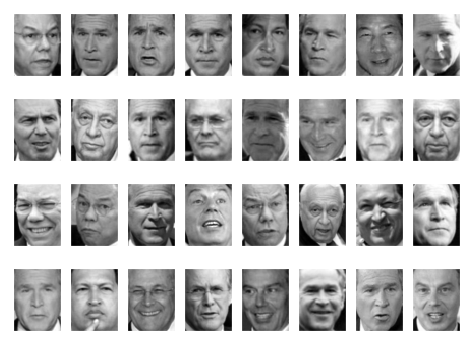

In [139]:
fig, ax = plt.subplots(4, 8, figsize=(8,6), subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

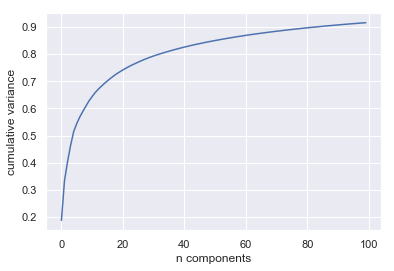

In [140]:
from sklearn.decomposition import PCA
model = PCA(n_components=100, svd_solver='randomized').fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components') # Количество компонент
plt.ylabel('cumulative variance'); # Интегральная дисперсия

Как видим, для сохранения 90 % дисперсии необходимо почти 100 компонент. Это значит, что данные, по своей сути, имеют чрезвычайно высокую размерность и их невозможно описать линейно с помощью всего нескольких компонент. В подобном случае могут оказаться полезны нелинейные вложения на базе многообразий, такие как LLE и Isomap.

In [141]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(1348L, 2L)

In [8]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2: 
                # Не отображаем слишком близко расположенные точки
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
            ax.add_artist(imagebox)

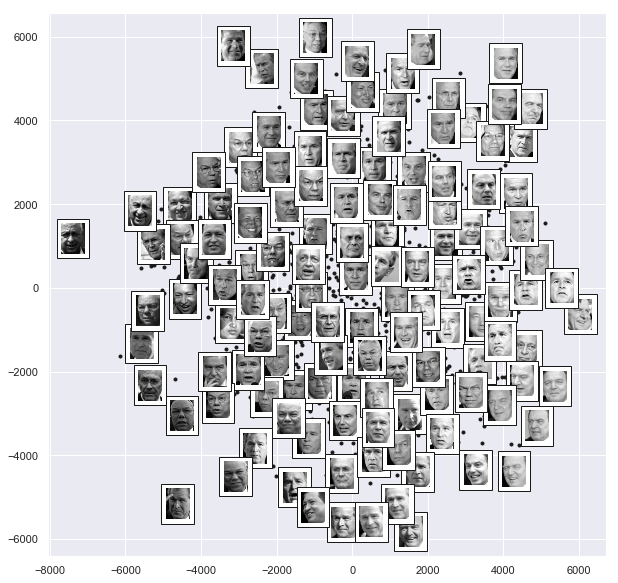

In [148]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

# Пример: визуализация структуры цифр

In [152]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000L, 784L)

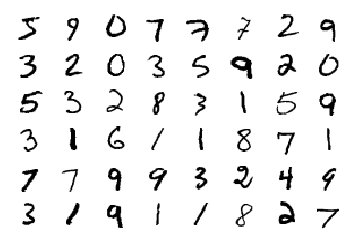

In [153]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

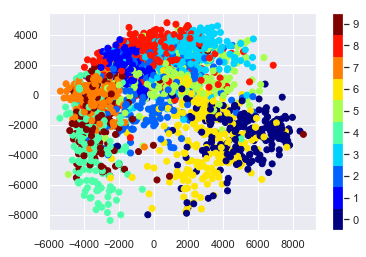

In [154]:
# используем только 1/30 часть данных:
# вычисления для полного набора данных занимают длительное время!
data = mnist.data[::30]
target = mnist.target[::30]
model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

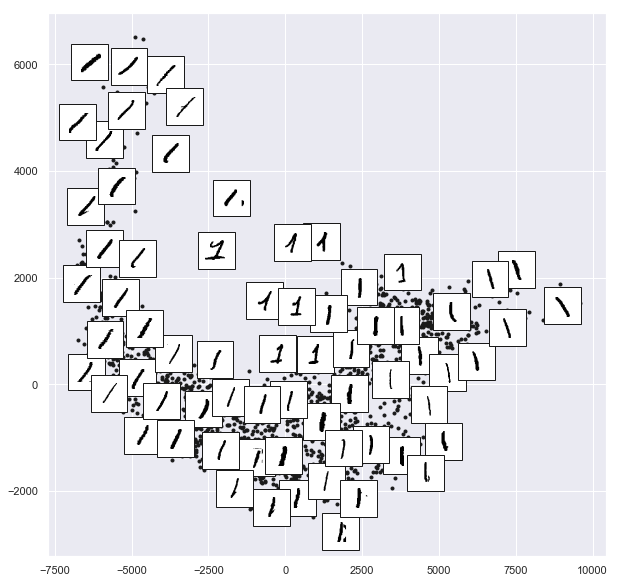

In [9]:
from sklearn.manifold import Isomap
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # для стилизации графиков
import numpy as np
mnist = fetch_openml('mnist_784')
# Выбираем для проекции 1/4 цифр "1"
data = mnist.data[mnist.target == '1'][::4]
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')

# Кластеризация методом k-средних

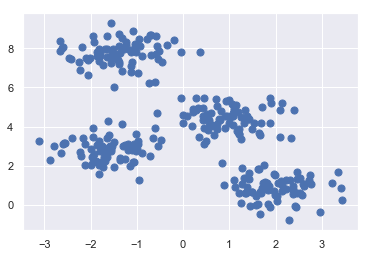

In [38]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

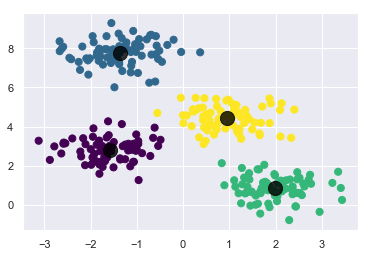

In [40]:
from sklearn.cluster import KMeans #АЛГОРИТМ K-MEANS
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)

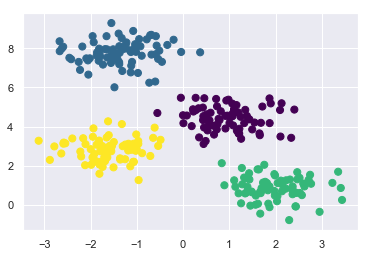

In [44]:
from sklearn.metrics import pairwise_distances_argmin #РЕАЛИЗАЦИЯ АЛГОРИТМА К-СРЕДНИХ
def find_clusters(X, n_clusters, rseed=2):
    # 1. Выбираем кластеры случайным образом
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True: 
        labels = pairwise_distances_argmin(X, centers) # 2a. Присваиваем метки в соответствии с ближайшим центром  
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]) # 2b. Находим новые центры, исходя из средних значений точек        
        if np.all(centers == new_centers): # 2c. Проверяем сходимость
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# При использовании алгоритма максимизации математического ожидания следует иметь в виду несколько нюансов.


1) Глобально оптимальный результат может оказаться недостижимым в принципе. Во-первых, хотя процедура EM гарантированно улучшает результат на каждом шаге, уверенности в том, что она ведет к глобально наилучшему решению, нет. Например, если мы воспользуемся в нашей простой процедуре другим начальным значением для генератора случайных чисел, полученные начальные гипотезы приведут к неудачным результатам

2) Количество кластеров следует выбирать заранее. Еще одна часто встречающаяся проблема с методом k-средних заключается в том, что ему необходимо сообщить, какое количество кластеров вы ожидаете: он не умеет вычислять количество кластеров на основе данных.

3) Применение метода k-средних ограничивается случаем линейных границ кластеров. Базовое допущение модели k-средних (точки должны быть ближе к центру их собственного кластера, чем других) означает, что этот алгоритм зачастую будет неэффективен в случае сложной геометрии кластеров.
В частности, границы между кластерами в методе k-средних всегда будут линейными, а значит, он будет плохо работать в случае более сложных границ.

4) Метод k-средних работает довольно медленно в случае большого количества выборок. Алгоритм может работать довольно медленно при росте числа выборок, ведь при каждой итерации методу k-средних необходимо обращаться к каждой точке в наборе данных. Интересно, можно ли смягчить это требование относительно использования всех данных при каждой итерации? Например, можно применить лишь подмножество данных для корректировки центров кластеров на каждом шаге. Эта идея лежит в основе пакетных алгоритмов k-средних, один из которых реализован в классе sklearn.cluster.MiniBatchKMeans.

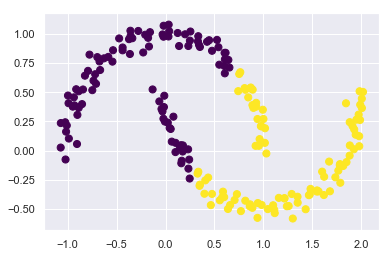

In [46]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Ситуация напоминает обсуждавшееся в разделе «Заглянем глубже: метод опорных векторов» этой главы, где мы использовали ядерное преобразование для проецирования данных в пространство более высокой размерности, в котором возможно линейное разделение. Можно попробовать воспользоваться той же уловкой, чтобы метод k-средних стал распознавать нелинейные границы.
Одна из версий этого ядерного метода k-средних реализована в библиотеке Scikit-Learn в оценивателе SpectralClustering. Она использует граф ближайших соседей для вычисления представления данных более высокой размерности, после чего задает соответствие меток с помощью алгоритма k-средних

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


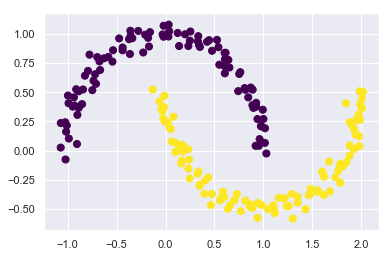

In [47]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Пример 1: применение метода k-средних для рукописных цифр

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797L, 64L)

In [49]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10L, 64L)

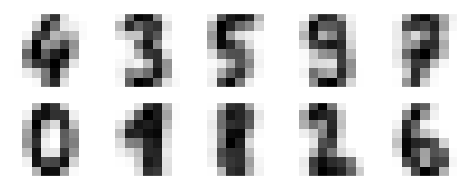

In [50]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [51]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(89.18,0.5,'predicted label')

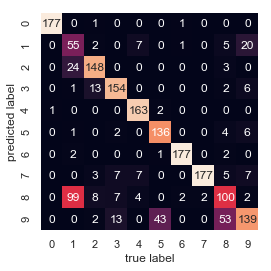

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Воспользуемся для предварительной обработки данных до выполнения k-средних алгоритмом стохастического вложения соседей на основе распределения Стьюдента (t-SNE), упоминавшимся в разделе «Заглянем глубже: обучение на базе многообразий» этой главы. t-SNE — нелинейный алгоритм вложения, особенно хорошо умеющий сохранять точки внутри кластеров.

In [54]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2, init='pca', random_state=0) # Проекция данных: выполнение этого шага займет несколько секунд
digits_proj = tsne.fit_transform(digits.data)
# Расчет кластеров
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
# Перестановка меток местами
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Оценка точности
accuracy_score(digits.target, labels)

0.9398998330550918

# Пример 2: использование метода k-средних для сжатия цветов

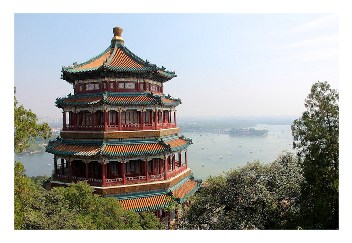

In [55]:
# Обратите внимание: для работы этого кода
# должен быть установлен пакет pillow
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [56]:
china.shape #(высота, ширина, RGB), содержащем вклад в цвет по красному/синему/зеленому каналам в виде целочисленных значений от 0 до 255

(427L, 640L, 3L)

In [57]:
data = china / 255.0 # используем шкалу 0...1
data = data.reshape(427 * 640, 3) # Изменим форму данных на [n_samples × n_features]
data.shape

(273280L, 3L)

In [58]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        # Выбираем случайное подмножество
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20)

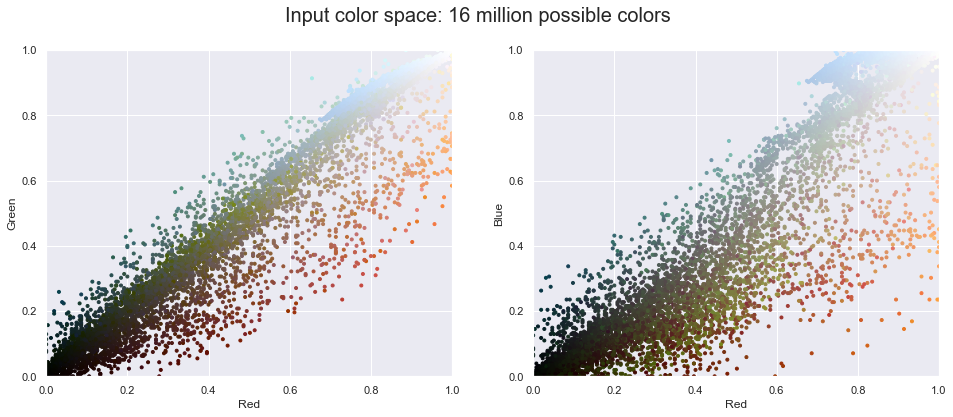

In [59]:
plot_pixels(data, title='Input color space: 16 million possible colors') # Исходное цветовое пространство: 16 миллионов
# возможных цветов

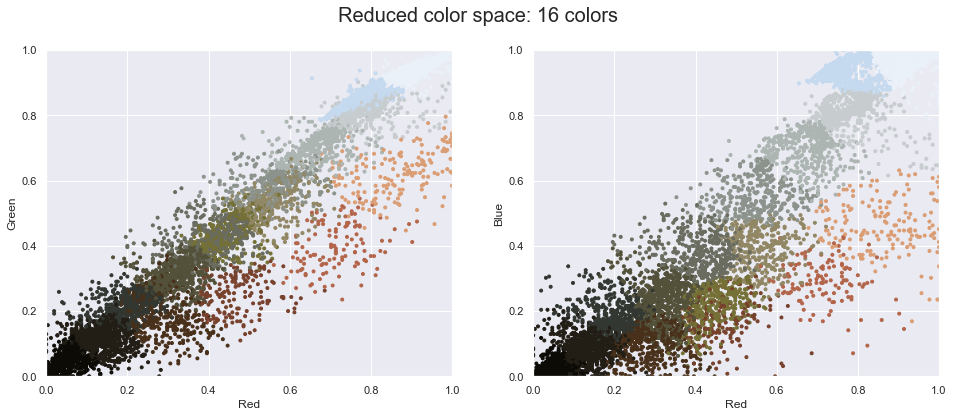

In [60]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")
# Редуцированное цветовое пространство: 16 цветов

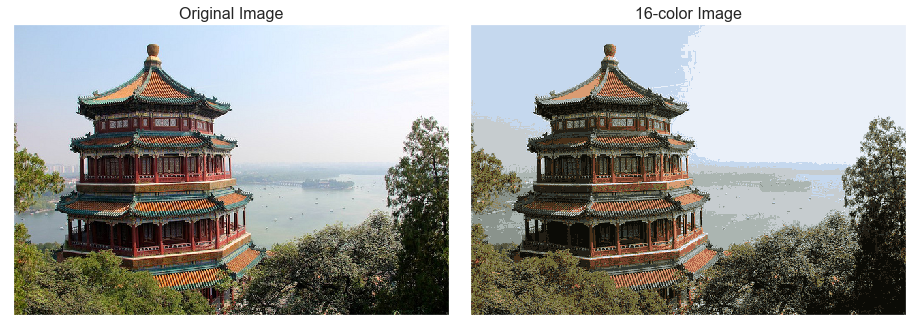

In [61]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16) # Первоначальное изображение
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16); # 16-цветное изображение

# Недостатки метода k-средних

In [62]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # Выводим на рисунок входные данные
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # Выводим на рисунок представление модели k-средних
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [63]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # Транспонируем для удобства оси координат

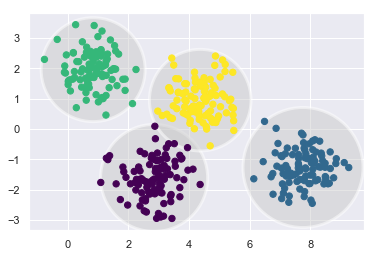

In [64]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

Модель k-средних можно рассматривать, в частности, как помещающую окружности (или в пространствах большей размерности гиперсферы) с центрами в центрах каждого из кластеров и радиусом, соответствующим расстоянию до наиболее удаленной точки кластера. Этот радиус задает жесткую границу соответствия точки кластеру в обучающей последовательности: все точки, находящиеся снаружи этой окружности, не считаются членами кластера.

Немаловажный нюанс, касающийся метода k-средних, состоит в том, что эти модели кластеров обязательно должны иметь форму окружностей: метод k-средних не умеет работать с овальными или эллипсовидными кластерами.

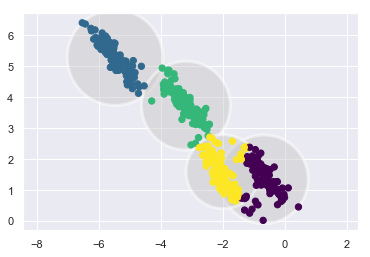

In [65]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

Визуально заметно, что форма этих преобразованных кластеров некруглая, а значит, круглые кластеры плохо подойдут для их описания. Тем не менее метод k-средних недостаточно гибок для учета этого нюанса и пытается втиснуть данные в четыре круглых кластера. Это приводит к перепутанным меткам кластеров в местах перекрытия получившихся окружностей, см. нижнюю правую часть графика.

Отсутствие гибкости в вопросе формы кластеров и отсутствие вероятностного присвоения меток кластеров — два недостатка метода k-средних, означающих, что для многих наборов данных (особенно низкоразмерных) он будет работать не столь хорошо, как хотелось бы.

# Обобщение EM-модели: смеси Гауссовых распределений (gaussian mixture model, GMM)

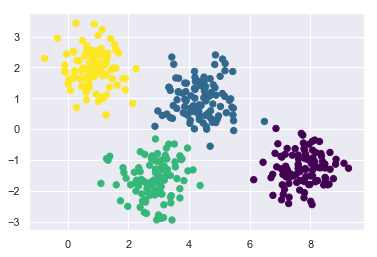

In [68]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [69]:
probs = gmm.predict_proba(X) #Возвращает вероятность принадлежности точек к определенному классу
print(probs[:5].round(3))

[[0.463 0.537 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]]


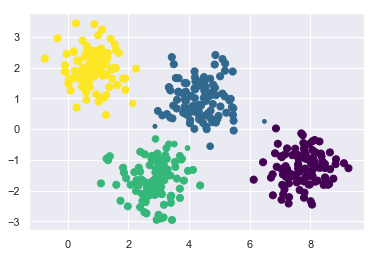

In [70]:
size = 50 * probs.max(1) ** 2 # Размер в зависимости от вероятности.
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

«Под капотом» смесь Гауссовых распределений очень напоминает метод k-средних: она использует подход с максимизацией математического ожидания, который с качественной точки зрения делает следующее.

1. Выбирает первоначальные гипотезы для расположения и формы кластеров.
2. Повторяет до достижения сходимости:

E-шаг — для каждой точки находит веса, кодирующие вероятность ее принадлежности к каждому кластеру;

M-шаг — для каждого кластера корректирует его расположение, нормализацию и форму на основе информации обо всех точках данных с учетом весов.

In [75]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Рисует эллипс с заданными расположением и ковариацией"""
    ax = ax or plt.gca()
    # Преобразуем ковариацию к главным осям координат
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Рисуем эллипс
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

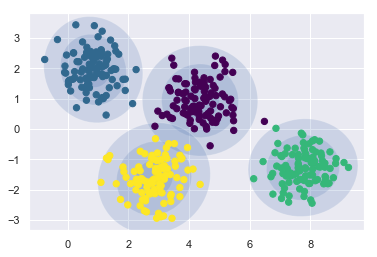

In [76]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

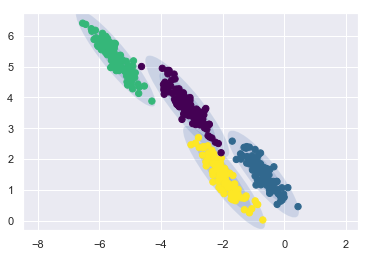

In [78]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

# Выбор типа ковариации

Параметр covariance_type - управляет степенями свободы форм кластеров. 

1) Значение его по умолчанию — covariance_type="diag", означающее возможность независимого задания размеров кластера по всем измерениям с выравниванием полученного эллипса по осям координат.

2) Несколько более простая и быстро работающая модель — covariance_type="spherical", ограничивающая форму кластера таким образом, что все измерения равнозначны между собой. Получающаяся в этом случае кластеризация будет аналогична методу k-средних, хотя и не полностью идентична.

3) Вариант с covariance_type="full" представляет собой более сложную и требующую больших вычислительных затрат модель (особенно при росте числа измерений), в которой любой из кластеров может быть эллипсом с произвольной ориентацией.

# GaussianMixture Model как метод оценки плотности распределения

Аппроксимация каких-либо данных методом GMM формально является не моделью кластеризации, а порождающей вероятностной моделью, описывающей распределение данных.

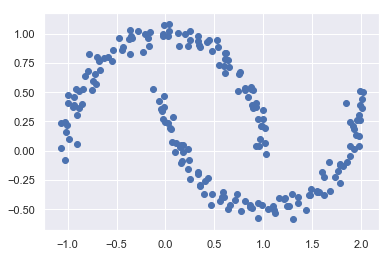

In [79]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

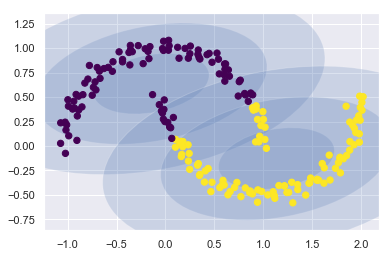

In [80]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

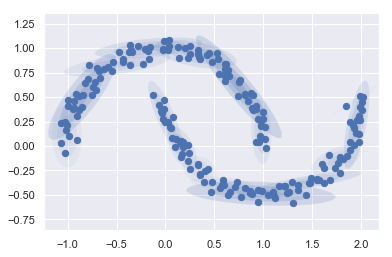

In [81]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

В данном случае смесь 16 нормальных распределений служит не для поиска отдельных кластеров данных, а для моделирования общего распределения входных данных. Это порождающая модель распределения, то есть GMM предоставляет нам способ генерации новых случайных данных, распределенных аналогично исходным. Например, вот 400 новых точек, полученных из этой аппроксимации наших исходных данных 16-компонентным алгоритмом GMM

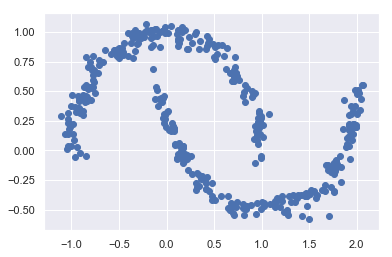

In [88]:
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1])

Метод GMM — удобное гибкое средство моделирования произвольного многомерного распределения данных.
# Сколько компонент необходимо?

Text(0.5,0,'n_components')

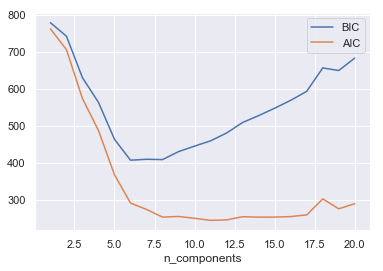

In [89]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC') #байесовский информационный критерий
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC') #информационный критерий Акаике
plt.legend(loc='best')
plt.xlabel('n_components')

Способ введения поправки на переобучение — подстройка функции правдоподобия модели с помощью некоторого аналитического критерия, например информационного критерия Акаике (Akaike information criterion, AIC, см.: https://ru.wikipedia.org/wiki/ Информационный_критерий_Акаике) или байесовского информационного критерия.
Оптимальное количество кластеров — то, которое минимизирует AIC или BIC, в зависимости от требуемой аппроксимации.

# Пример: использование метода GMM для генерации новых данных

In [90]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797L, 64L)

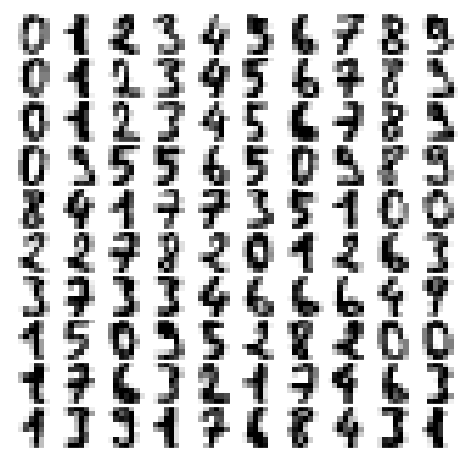

In [91]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Наш набор данных состоит почти из 1800 цифр в 64 измерениях. Построим на их основе GMM, чтобы сгенерировать еще. У смесей Гауссовых распределений могут быть проблемы со сходимостью в пространстве столь высокой размерности, поэтому начнем с применения обратимого алгоритма для понижения размерности данных. Воспользуемся для этой цели простым алгоритмом PCA с сохранением 99 % дисперсии в проекции данных:

In [92]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797L, 41L)

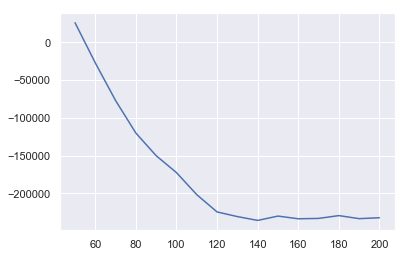

In [95]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [97]:
gmm = GaussianMixture(120, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [100]:
data_new = gmm.sample(100) #порождаем новые данные
data_new[0].shape

(100L, 41L)

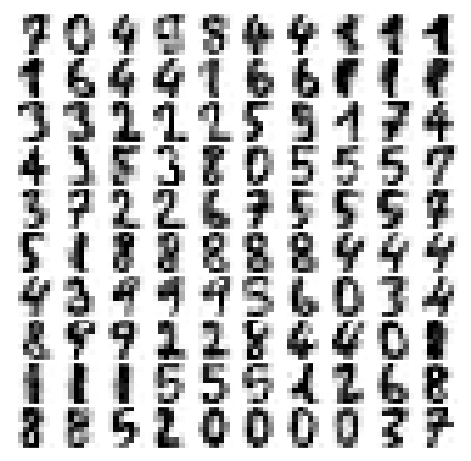

In [102]:
digits_new = pca.inverse_transform(data_new[0]) #обратное преобразование pca для новых данных
plot_digits(digits_new)

# Ядерная оценка плотности распределения (KDE)

Оцениватель плотности — алгоритм, предназначенный для моделирования распределения вероятностей, на основе которого был сгенерирован набор данных.

Простой оцениватель плотности для одномерных данных — гистограмма. Гистограмма делит данные на дискретные интервалы значений, подсчитывает число точек, попадающих в каждый из интервалов, после чего визуализирует результат

In [103]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)

C:\Users\Vladuk\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


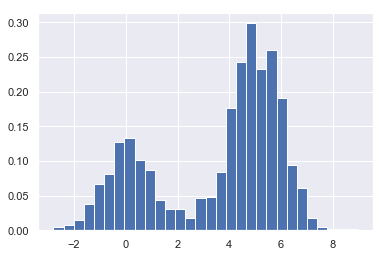

In [104]:
hist = plt.hist(x, bins=30, normed=True)

In [105]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

Одна из проблем использования гистограмм заключается в том, что конкретный выбор размера и расположения интервалов может привести к представлениям с качественно различными признаками. Например, если посмотреть на версию этих данных из 20 точек, конкретный выбор интервалов может привести к совершенно другой интерпретации данных!

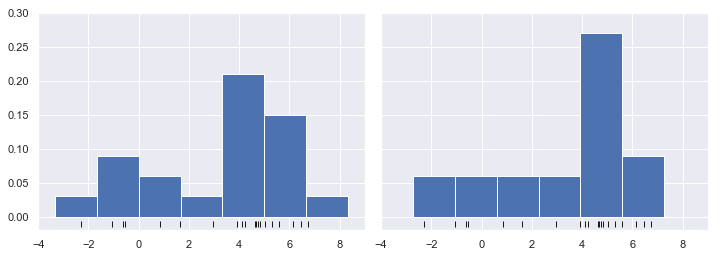

In [113]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

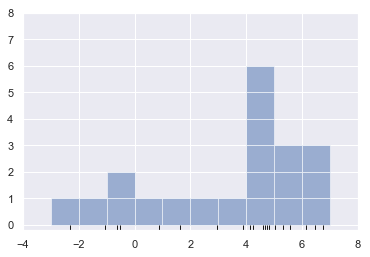

In [109]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
        ax.set_xlim(-4, 8)
        ax.set_ylim(-0.2, 8)

[-4, 8, -0.2, 8]

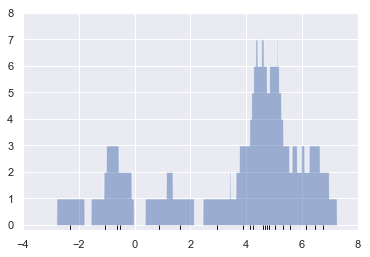

In [110]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8])

[-4, 8, -0.2, 5]

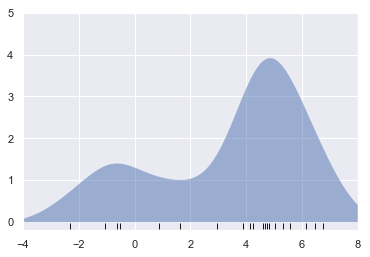

In [111]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5])

Два последних графика представляют собой примеры одномерной ядерной оценки плотности распределения: в первом используется так называемое ядро типа «цилиндр», а во втором — Гауссово ядро.

# Ядерная оценка плотности распределения на практике

Свободными параметрами ядерной оценки плотности распределения являются ядро (kernel), определяющее форму распределения в каждой точке, и ширина ядра (kernel bandwidth), определяющая размер ядра в каждой точке.

Оцениватель sklearn.neighbors.KernelDensity, умеющем работать с KDE в многомерном пространстве с одним из шести ядер и одной из нескольких дюжин метрик. В силу того что метод KDE может потребовать значительных вычислительных затрат, этот оцениватель использует «под капотом» алгоритм на основе деревьев и умеет достигать компромисса между временем вычислений и точностью с помощью параметров atol (absolute tolerance, допустимая абсолютная погрешность) и rtol (relative tolerance, допустимая относительная погрешность). Определить ширину ядра — свободный параметр — можно стандартными инструментами перекрестной проверки библиотеки Scikit-Learn.

(-0.02, 0.22)

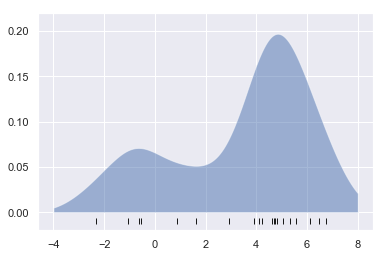

In [114]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=1.0, kernel='gaussian') # Создание экземпляра модели KDE и ее обучение
kde.fit(x[:, None])

logprob = kde.score_samples(x_d[:, None]) # score_samples возвращает логарифм плотности распределения вероятности
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

# Выбор ширины ядра путем перекрестной проверки.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut().get_n_splits(x))
grid.fit(x[:, None])

GridSearchCV(cv=20L, error_score='raise-deprecating',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bandwidth': array([ 0.1    ,  0.10476, ...,  9.54548, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [131]:
grid.best_params_ #Оптимальная ширина ядра

{'bandwidth': 1.1233240329780276}

# Прикладная задача: конвейер распознавания лиц

# HOG - Гистограмма направленных градиентов

Гистограмма направленных градиентов — простая процедура выделения признаков, разработанная для идентификации пешеходов на изображениях. Метод HOG включает следующие этапы.

1. Необязательная предварительная нормализация изображений. В результате получаются признаки, слабо зависящие от изменений освещенности.

2. Операция свертывания изображения с помощью двух фильтров, чувствительных к горизонтальным и вертикальным градиентам яркости. Это позволяет уловить информацию о границах, контурах и текстурах изображения.

3. Разбивка изображения на ячейки заранее определенного размера и вычисление гистограммы направлений градиентов в каждой из ячеек.

4. Нормализация гистограмм в каждой из ячеек путем сравнения с несколькими близлежащими ячейками. Это еще больше подавляет влияние освещенности на изображение.

5. Формирование одномерного вектора признаков из информации по каждой ячейке.

Text(0.5,1,'visualization of HOG features')

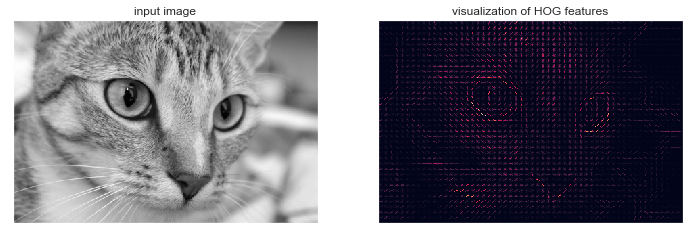

In [137]:
from skimage import data, color, feature
import skimage.data
image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

# Метод HOG в действии: простой детектор лиц

Алгоритм включает следующие шаги.

1. Получение миниатюр изображений, на которых представлены лица, для формирования набора «положительных» обучающих выборок.

2. Получение миниатюр изображений, на которых не представлены лица для формирования набора «отрицательных» обучающих выборок.

3. Выделение HOG-признаков из этих обучающих выборок.

4. Обучение линейного SVM-классификатора на этих выборках.

5. В случае «незнакомого» изображения перемещаем по изображению скользящее окно, применяя нашу модель для определения того, содержится ли в этом окне лицо или нет.

6. Если обнаруженные лица частично пересекаются, объединяем их в одно окно.

In [139]:
# Получаем набор положительных обучающих выборок.
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233L, 62L, 47L)

In [140]:
# Получаем набор отрицательных обучающих выборок.
from skimage import data, transform
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [142]:
from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

C:\Users\Vladuk\Anaconda2\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Vladuk\Anaconda2\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(30000L, 62L, 47L)

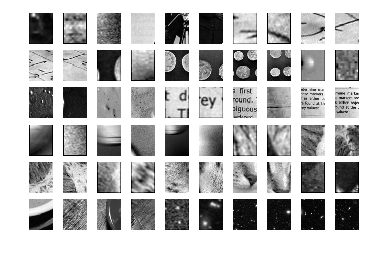

In [143]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [144]:
# Объединяем наборы и выделяем HOG-признаки.
from itertools import chain
X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1
X_train.shape

(43233L, 1215L)

In [145]:
# Обучаем метод опорных векторов.
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9866074526403442

In [1]:
model = grid.best_estimator_
model.fit(X_train, y_train)

NameError: name 'grid' is not defined

In [ ]:
# Выполняем поиск лиц в новом изображении.
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off')
